In [1]:
# generate random numbers in {0,1}

import random

for _ in range(10):
    print(random.randint(0, 1))

0
1
0
0
0
0
1
0
0
1


In [2]:
# generate random numbers in {0,1}
import random

# uniform distribution
def generate_random_value():
    return random.randint(0, 1)

for _ in range(10):
    print(generate_random_value())

0
1
1
1
0
0
0
0
0
1


In [3]:
# create chromosome

import random

# uniform distribution
def generate_random_value():
    return random.randint(0, 1)

# n: size of chromosome
def create_chromosome(n=10):
    return [generate_random_value() for _ in range(n)]

individual = create_chromosome()
print(individual)

[0, 1, 0, 0, 0, 0, 1, 0, 1, 1]


In [4]:
# create a population

# m: size of population
def create_population(m=8):
    return [create_chromosome() for _ in range(m)]

# print population
def print_population(population, m=8):
    for i in range(m):
        print(population[i])
        
population = create_population()
print_population(population)

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
[1, 1, 1, 0, 0, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 1, 0, 0, 1, 1, 0]


In [5]:
# Evaluate function: User-defined function

def evaluate(individual):
    return sum(individual)

m = 8
for i in range(m):
    print(population[i], evaluate(population[i]))

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0] 3
[0, 0, 0, 0, 0, 1, 1, 1, 0, 0] 3
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1] 3
[1, 1, 1, 0, 0, 1, 1, 1, 1, 0] 7
[0, 0, 1, 0, 1, 1, 1, 1, 0, 0] 5
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1] 3
[1, 0, 1, 0, 0, 1, 0, 0, 0, 1] 4
[0, 0, 1, 0, 1, 0, 0, 1, 1, 0] 4


In [6]:
# sorting

a_list = [2, 5, 6, 3, 9]
a_list = sorted(a_list)
print(a_list)

[2, 3, 5, 6, 9]


In [7]:
a_list = [[2, 6],
          [1, 9],
          [7, 4],
          [9, 8],
          [5, 5]]
a_list = sorted(a_list)
print(a_list)

[[1, 9], [2, 6], [5, 5], [7, 4], [9, 8]]


In [8]:
def indicator(list_element):
    return -list_element

a_list = [2, 5, 6, 3, 9]
a_list = sorted(a_list, key=indicator)
print(a_list)

[9, 6, 5, 3, 2]


In [9]:
def indicator(list_element):
    return sum(list_element)

a_list = [[2, 6],
          [1, 9],
          [7, 4],
          [9, 8],
          [5, 5]]
a_list = sorted(a_list, key=indicator)
print(a_list)

[[2, 6], [1, 9], [5, 5], [7, 4], [9, 8]]


In [10]:
# sort population
population_sorted = sorted(population, key=evaluate)

# print population
for i in range(m):
    print(population_sorted[i], evaluate(population_sorted[i]))

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0] 3
[0, 0, 0, 0, 0, 1, 1, 1, 0, 0] 3
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1] 3
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1] 3
[1, 0, 1, 0, 0, 1, 0, 0, 0, 1] 4
[0, 0, 1, 0, 1, 0, 0, 1, 1, 0] 4
[0, 0, 1, 0, 1, 1, 1, 1, 0, 0] 5
[1, 1, 1, 0, 0, 1, 1, 1, 1, 0] 7


In [11]:
# selection: get 2 different indices; index in [0,7]

def generate_two_indices():
    index1 = random.randint(0,7)
    index2 = random.randint(0,7)
    
    # generate until index1!=index2
    while True:
        if index1==index2:
            index2 = random.randint(0,7)
        else:
            break
            
    return index1, index2

# test
index1, index2 = generate_two_indices()
print(index1, index2)

5 6


In [12]:
# selection: get 2 different indices; index in [0,7]

def generate_two_indices():
    index1 = random.randint(0,7)
    index2 = random.randint(0,7)
    
    # generate until index1!=index2
    while index1 == index2:
        index2 = random.randint(0,7)
            
    return index1, index2

# test
index1, index2 = generate_two_indices()
print(index1, index2)

7 2


In [13]:
# selection a better chromosome

def select_individual():
    index1, index2 = generate_two_indices()
    if index1 > index2:
        individual = population_sorted[index1]
    else:
        individual = population_sorted[index2]
        
    return individual

# test
individual = select_individual()
print(individual, evaluate(individual))

[1, 1, 1, 0, 0, 1, 1, 1, 1, 0] 7


In [14]:
# crossover
individual1 = population_sorted[3]
individual2 = population_sorted[4]
crossover_rate = 0.8
n = 10

def crossover(individual1, individual2, crossover_rate = 0.8):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(n):    
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
            
    return individual1_new, individual2_new
        
print('before crossover')
print(individual1)
print(individual2)

print('after crossover')
individual1_new, individual2_new = crossover(individual1, individual2)
print(individual1_new)
print(individual2_new)

before crossover
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 1, 0, 0, 0, 1]
after crossover
[1, 0, 1, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [15]:
# mutate

def mutate(individual, mutation_rate=0.1):
    individual_mut = individual.copy()
    for i in range(n):    
        if random.random() < mutation_rate:
            print(i)
            individual_mut[i] = generate_random_value()
            
    return individual_mut

individual = population_sorted[3]
individual_mut = mutate(individual)
print(individual)
print(individual_mut)

7
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


In [35]:
# Chương trình cài đặt với mục đích dễ hiểu
# Nhiều chỗ có thể cải tiến về mặt computation và memory


import random

n = 30                 # size of individual (chromosome)
m = 100                # size of population

# generate a feasible value
def generate_random_value():
    return random.randint(0, 1)

def create_individual():
    return [generate_random_value() for _ in range(n)]

# evaluate an individual
def compute_fitness(individual):
    return sum(individual)

# crossover
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

# mutatation
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

# selection; input population is sorted according to fitnesses
def selection(sorted_old_population):    
    index1 = random.randint(0, m-1)
    index2 = random.randint(0, m-1) 
    
    # check until index2 != index1
    while index2 == index1:
        index2 = random.randint(0, m-1) 
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 


##### algorithm
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
n_generations = 30     # number of generations
elitism = 2
for i in range(n_generations):
    # step 2: sort population
    sorted_population = sorted(population, key=compute_fitness)
        
    # for debug
    print("BEST:", compute_fitness(sorted_population[m-1]))
    
    # elitism
    new_population = sorted_population[-elitism:]

    while len(new_population) < m:
        # step 3: selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # step 4: crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # step 5: mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        # copy to new population
        new_population.append(individual_m1)
        new_population.append(individual_m2)
        
    # update population
    population = new_population

BEST: 22
BEST: 22
BEST: 23
BEST: 23
BEST: 23
BEST: 25
BEST: 25
BEST: 25
BEST: 25
BEST: 26
BEST: 26
BEST: 27
BEST: 27
BEST: 27
BEST: 28
BEST: 28
BEST: 28
BEST: 29
BEST: 29
BEST: 29
BEST: 29
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30


In [36]:
# Chương trình cài đặt với mục đích dễ hiểu
# Nhiều chỗ có thể cải tiến về mặt computation và memory

import random

n = 30                 # size of individual (chromosome)
m = 100                # size of population

# để vẽ biểu đồ quá trình tối ưu
fitnesses = []

# generate a feasible value
def generate_random_value():
    return random.randint(0, 1)

def create_individual():
    return [generate_random_value() for _ in range(n)]

# evaluate an individual
def compute_fitness(individual):
    return sum(individual)

# crossover
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

# mutatation
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

# selection; input population is sorted according to fitnesses
def selection(sorted_old_population):    
    index1 = random.randint(0, m-1)
    index2 = random.randint(0, m-1)
    
    # check until index2 != index1
    while index2 == index1:
        index2 = random.randint(0, m-1)
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 


##### algorithm
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
n_generations = 30     # number of generations
for i in range(n_generations):
    # step 2: sort population
    sorted_population = sorted(population, key=compute_fitness)
    
    # for debug
    fitnesses.append(compute_fitness(sorted_population[m-1]))
    print("BEST:", compute_fitness(sorted_population[m-1]))        
    
    new_population = []
    while len(new_population) < m:
        # step 3: selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # step 4: crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # step 5: mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)
        
    # update population
    population = new_population

BEST: 21
BEST: 22
BEST: 23
BEST: 24
BEST: 25
BEST: 26
BEST: 26
BEST: 27
BEST: 27
BEST: 28
BEST: 28
BEST: 27
BEST: 28
BEST: 28
BEST: 29
BEST: 29
BEST: 29
BEST: 29
BEST: 29
BEST: 30
BEST: 30
BEST: 30
BEST: 29
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30


In [37]:
sorted_population = sorted(population, key=compute_fitness)
individual_best = sorted_population[m-1]
print(individual_best)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


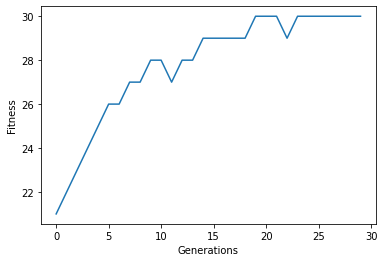

In [38]:
import matplotlib.pyplot as plt

plt.plot(fitnesses)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

In [39]:
# Elitisim

import random

n = 30                 # size of individual (chromosome)
m = 100                # size of population

# để vẽ biểu đồ quá trình tối ưu
fitnesses = []

# generate a feasible value
def generate_random_value():
    return random.randint(0, 1)

def create_individual():
    return [generate_random_value() for _ in range(n)]

# evaluate an individual
def compute_fitness(individual):
    return sum(individual)

# crossover
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

# mutatation
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

# selection; input population is sorted according to fitnesses
def selection(sorted_old_population):    
    index1 = random.randint(0, m-1)
    index2 = random.randint(0, m-1)
    
    # check until index2 != index1
    while index2 == index1:
        index2 = random.randint(0, m-1)
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 


##### algorithm
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
n_generations = 30     # number of generations
elitism = 2
for i in range(n_generations):
    # step 2: sort population
    sorted_population = sorted(population, key=compute_fitness)
        
    # for debug
    fitnesses.append(compute_fitness(sorted_population[m-1]))
    print("BEST:", compute_fitness(sorted_population[m-1]))      
    
    # create new_population
    new_population = sorted_population[-elitism:]   
    
    while len(new_population) < m:
        # step 3: selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # step 4: crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # step 5: mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)
        
    # update population
    population = new_population

BEST: 20
BEST: 21
BEST: 22
BEST: 23
BEST: 24
BEST: 25
BEST: 26
BEST: 26
BEST: 27
BEST: 28
BEST: 28
BEST: 28
BEST: 28
BEST: 29
BEST: 29
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30
BEST: 30


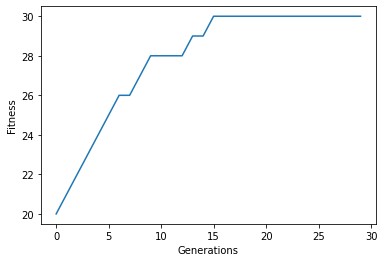

In [40]:
import matplotlib.pyplot as plt

plt.plot(fitnesses)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()